<a href="https://colab.research.google.com/github/Vaycold/statistics_seminar/blob/main/tempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the data

In [185]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [186]:
os.environ['KAGGLE_USERNAME'] = 'kimgodbang'
os.environ['KAGGLE_KEY'] = '1c0e1716b23829d4381dcbced37ba49b'

In [229]:
!rm *.*
!kaggle competitions download -c sentiment-analysis-of-covid-19-related-tweets
#!unzip '*.zip'

#df_case = pd.read_csv('RAW_global_confirmed_cases.csv')
#df_death = pd.read_csv('RAW_global_deaths.csv')

  0% 0.00/254k [00:00<?, ?B/s]
100% 254k/254k [00:00<00:00, 80.3MB/s]
  0% 0.00/518k [00:00<?, ?B/s]
100% 518k/518k [00:00<00:00, 73.3MB/s]


In [230]:

'''
# 0 : Optimistic / 낙관적인
# 1 : Thankful   / 감사하는
# 2 : Empathetic / 감정이입
# 3 : Pessimistic / 비관적인
# 4 : Anxious    / 불안
# 5 : Sad        / 슬픔
# 6 : Annoyed    / 즐거움
# 7 : Denial     / 부정적인
# 8 : Surprise   / 놀라다
# 9 : Official report / 공식적인 발표
# 10 : Joking    / 농담
'''
df = pd.read_csv('training.csv')
test_df = pd.read_csv('validation.csv')

In [28]:
!pip install sentencepiece

     |████████████████████████████████| 1.2MB 7.7MB/s 


## EDA

In [231]:
df.head()

,ID,Tweet,Labels
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0 10
1,2,BanMediaHouse whose is responsible for spreadi...,6
2,3,Im waiting for someone to say to me that all t...,3 4
3,4,He is a liar. Proven day night. Time again. Li...,6
4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",8


In [232]:
print(df.shape, df.shape)

(5000, 3) (5000, 3)


In [233]:
def labelsplit(labels) :
    
    label = labels.replace(' ',',').split(',')
    for idx, lab in enumerate(label) :
        label[idx] = int(lab)
    return label

def lab2onehot(labels) :
    onehot = [0 for i in range(11)]
    label = labels.replace(' ',',').split(',')
    for value in label :
        onehot[int(value)] = 1
    
    return np.array(onehot)

In [234]:
df['label']  = df['Labels'].apply(lambda x :  labelsplit(x))
df['onehot']  = df['Labels'].apply(lambda x :  lab2onehot(x))

In [235]:
df.head()

,ID,Tweet,Labels,label,onehot
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0 10,"[0, 10]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
1,2,BanMediaHouse whose is responsible for spreadi...,6,[6],"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
2,3,Im waiting for someone to say to me that all t...,3 4,"[3, 4]","[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]"
3,4,He is a liar. Proven day night. Time again. Li...,6,[6],"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",8,[8],"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"


In [236]:
all_tweet = np.array(df.Tweet.values)
with open('./all_tweet.txt', 'w', encoding='utf-8') as f:
    for line in all_tweet : 
        if len(str(line).strip()) == 0 : continue
        try : 
            f.write(line + '\n')
        except : continue
            

In [237]:
!cat all_tweet.txt |head -n10

NO JOKE I WILL HOP ON A PLANE RN! (Well after COVID19 lol)
BanMediaHouse whose is responsible for spreading Fake and communal Stories in this pandemic Corona situation.
Im waiting for someone to say to me that all this corona thing is just an April fools joke
He is a liar. Proven day night. Time again. Lies when the truth will do. COVID19
NEW: U.S. CoronaVirus death toll reaches 4,000 after nearly 900 new deaths were reported today (BNO News) Covid19 CoronaVirusOutbreak
Coronavirus impact Govt extends I-T deadlines related to Sections 80C, 80D
42,000 people might have died in China from Covid19 but China was underreporting according to sources.
Dear Chinese! Kindly cook your bat thoroughly next time. Regards, COVID19 CoronaVirusUpdates CoronaVirus
This is how the govt of kenya is checking the temperatures of COVID19 and saying it is still low. Mtashangaa sana.
My mental health hasn't suffered at all under the coronavirus quarantine! Ha-ha, April Fools.


In [29]:
import sentencepiece as spm

In [238]:
spm.SentencePieceTrainer.train('--input=all_tweet.txt --model_prefix=m --vocab_size=8987')
sp =spm.SentencePieceProcessor()
sp.load('m.model')

True

In [239]:
s = "I don't speak English"
sp.encode_as_pieces(s)

['▁I', '▁don', "'", 't', '▁speak', '▁Engl', 'ish']

In [240]:
sp.encode_as_ids(s)

[10, 240, 23, 25, 1006, 3646, 664]

In [241]:
df['bow'] = df['Tweet'].apply(lambda x : sp.encode_as_ids(str(x)))

In [242]:
train_df = df[:4000]
test_df = df[4000:]

In [243]:
train_df.head()

,ID,Tweet,Labels,label,onehot,bow
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0 10,"[0, 10]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[1535, 1582, 10, 1444, 6555, 1481, 77, 4838, 5..."
1,2,BanMediaHouse whose is responsible for spreadi...,6,[6],"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]","[1921, 4543, 4546, 79, 506, 14, 2075, 148, 19,..."
2,3,Im waiting for someone to say to me that all t...,3 4,"[3, 4]","[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]","[76, 182, 8, 19, 245, 6, 82, 6, 37, 28, 49, 21..."
3,4,He is a liar. Proven day night. Time again. Li...,6,[6],"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]","[360, 14, 9, 2977, 3, 4436, 4293, 102, 552, 3,..."
4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",8,[8],"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[1571, 42, 306, 3, 137, 3, 269, 201, 525, 854,..."


In [201]:
test_df.head()

,ID,Tweet,Labels,label,onehot,bow
4000,4001,Laker fans: Kobe died! I dont want this anymor...,5 10,"[5, 10]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]","[5804, 173, 2083, 42, 1998, 286, 46, 10, 124, ..."
4001,4002,Spend 20 minutes looking at pore strips bored....,3 10,"[3, 10]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]","[6155, 1823, 827, 1353, 238, 8, 67, 1271, 108,..."
4002,4003,"On the Coronavirus, the dock media is doing Hi...",6 9,"[6, 9]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]","[627, 4, 30, 12, 4, 99, 1112, 409, 14, 310, 11..."
4003,4004,Memo to Trump: economies recover; dead people ...,6,[6],"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]","[5126, 6, 129, 42, 5618, 136, 1683, 340, 380, ..."
4004,4005,Tell me why it's more important to do our go b...,6 10,"[6, 10]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]","[1453, 37, 247, 32, 23, 5, 119, 1335, 6, 99, 1..."


In [202]:
train_text = train_df['bow'].values
test_text = test_df['bow'].values

In [203]:
train_df['onehot'][0]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [77]:
import collections 
word_count = collections.Counter()
for text in bow_text :
    word_count.update(text)
word_count.most_common(10)

[(3, 2836),
 (4, 2481),
 (6, 2020),
 (5, 2011),
 (8, 1639),
 (9, 1488),
 (10, 1434),
 (11, 1397),
 (13, 1337),
 (12, 1320)]

In [34]:
len(train_df['Tweet'].values)

5000

In [54]:
# 단어의 총 갯수 
len(list(set([word for seq in train_df['Tweet'].values for word in seq.split()])))

15348

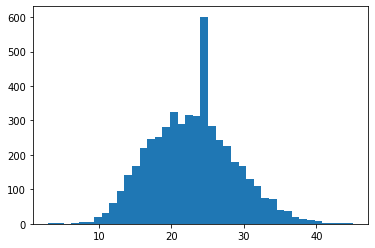

In [98]:
plt.hist([len(s) for s in bow_text], bins =40)
plt.show()

In [116]:
def n_cut(texts, n) :
    return np.array([[word for word in text if word_count[word] >= n ] for text in texts])

In [117]:
cut_bow = n_cut(bow_text, 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [124]:
pad_bow = tf.keras.preprocessing.sequence.pad_sequences(cut_bow, maxlen=50)

In [125]:
pad_bow.shape

(5000, 50)

In [126]:
pad_bow[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  10,  77,  46, 220, 193,  20,  17, 369, 160], dtype=int32)

In [127]:
# bow -> text
def bow2txt(bow) :
    return sp.decode_ids(bow)

In [133]:
bow2txt(train_df['bow'][4231])

'Coronavirus should just tell us April fool abeg, let things go back to normal'

In [142]:
from keras.layers import Input, Embedding, GRU, Dense
from keras.models import Model

def seq2seq() :
    input_x_bow = Input(shape=(50,))
    embedding = Embedding(8987, 100)
    x = embedding(input_x_bow)
    z = GRU(64)(x)

    y = Dense(11, activation ='sigmoid')(z)

    model = Model(input_x_bow, y)
    model.compile(
        loss = 'binary_crossentropy',
        optimizer = 'adam',
        metrics = ['accuracy']
    )
    return model

In [141]:
seq2seq().summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 50, 100)           898700    
_________________________________________________________________
gru (GRU)                    (None, 64)                31872     
_________________________________________________________________
dense (Dense)                (None, 11)                715       
Total params: 931,287
Trainable params: 931,287
Non-trainable params: 0
_________________________________________________________________


In [148]:
train_df.head(1)

,ID,Tweet,Labels,label,onehot,bow
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0 10,"[0, 10]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[1535, 1582, 10, 1444, 6555, 1481, 77, 4838, 5..."


In [149]:
train_df[:10]

,ID,Tweet,Labels,label,onehot,bow
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0 10,"[0, 10]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[1535, 1582, 10, 1444, 6555, 1481, 77, 4838, 5..."
1,2,BanMediaHouse whose is responsible for spreadi...,6,[6],"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]","[1921, 4543, 4546, 79, 506, 14, 2075, 148, 19,..."
2,3,Im waiting for someone to say to me that all t...,3 4,"[3, 4]","[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]","[76, 182, 8, 19, 245, 6, 82, 6, 37, 28, 49, 21..."
3,4,He is a liar. Proven day night. Time again. Li...,6,[6],"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]","[360, 14, 9, 2977, 3, 4436, 4293, 102, 552, 3,..."
4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",8,[8],"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[1571, 42, 306, 3, 137, 3, 269, 201, 525, 854,..."
5,6,Coronavirus impact Govt extends I-T deadlines ...,5 8,"[5, 8]","[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]","[30, 944, 1833, 1149, 5, 10, 56, 354, 380, 407..."
6,7,"42,000 people might have died in China from Co...",6 7 8,"[6, 7, 8]","[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]","[3601, 65, 382, 47, 286, 18, 214, 50, 73, 17, ..."
7,8,Dear Chinese! Kindly cook your bat thoroughly ...,5 10,"[5, 10]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]","[1531, 173, 544, 46, 2052, 68, 2106, 90, 1553,..."
8,9,This is how the govt of kenya is checking the ...,3 6 9,"[3, 6, 9]","[0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]","[114, 14, 110, 4, 1013, 16, 573, 4122, 14, 938..."
9,10,My mental health hasn't suffered at all under ...,10,[10],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[164, 1609, 353, 2132, 23, 25, 1773, 34, 67, 4..."


In [154]:
bow_text[:4500]

array([list([1535, 1582, 10, 1444, 6555, 1481, 77, 4838, 5224, 46, 220, 4549, 193, 20, 17, 369, 160]),
       list([1921, 4543, 4546, 79, 506, 14, 2075, 148, 19, 443, 2883, 15, 2588, 157, 8420, 18, 21, 155, 24, 581, 3]),
       list([76, 182, 8, 19, 245, 6, 82, 6, 37, 28, 49, 21, 11, 131, 14, 39, 71, 36, 51, 64]),
       ...,
       list([211, 1913, 2208, 3145, 9, 2165, 6691, 858, 16, 1820, 7541, 8, 1800, 5, 6, 244, 1235, 4, 2956, 19, 20, 17, 3557]),
       list([10, 210, 54, 263, 38, 314, 8, 9, 4752, 1115, 475, 9, 2434, 298, 174, 4141, 171, 19, 4, 320, 16, 567, 187, 66, 594, 11]),
       list([723, 21, 13, 14, 98, 188, 1840, 8, 26, 424, 6, 4917, 4, 194, 43, 1002, 6, 62])],
      dtype=object)

In [152]:
bow_text[4500:].shape

(500,)

In [158]:
pad_bow[:4500].shape

(4500, 50)

In [218]:
x_train = pad_bow[:4000].astype(np.float32)
x_test = pad_bow[4000:].astype(np.float32)
y_train = train_df['onehot'].values[:4000]
y_test = train_df['onehot'].values[4000:]

In [226]:
model = seq2seq()
model.fit(x_train, y_train.reshape((-1,1)), 
          validation_data = (x_test, y_test.reshape((-1,1))),
          epochs = 2,
          verbose = 2)

ValueError: ignored

In [172]:
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [180]:
print(len(x_train))
print(len(x_train[0]))
print(x_train.shape)

4000
50
(4000, 50)


In [184]:
x_train

array([[  0.,   0.,   0., ...,  17., 369., 160.],
       [  0.,   0.,   0., ...,  24., 581.,   3.],
       [  0.,   0.,   0., ...,  36.,  51.,  64.],
       ...,
       [  0.,   0.,   0., ..., 144.,  27.,   3.],
       [  0.,   0.,   0., ...,   7., 403., 707.],
       [  0.,   0.,   0., ..., 312., 500., 123.]], dtype=float32)

In [227]:
y_train.reshape((-1,1))

array([[list([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])],
       [list([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])],
       [list([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])],
       ...,
       [list([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1])],
       [list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])],
       [list([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])]], dtype=object)

In [247]:
df.onehot.values[:2]

array([array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]),
       array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])], dtype=object)

NameError: ignored